In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

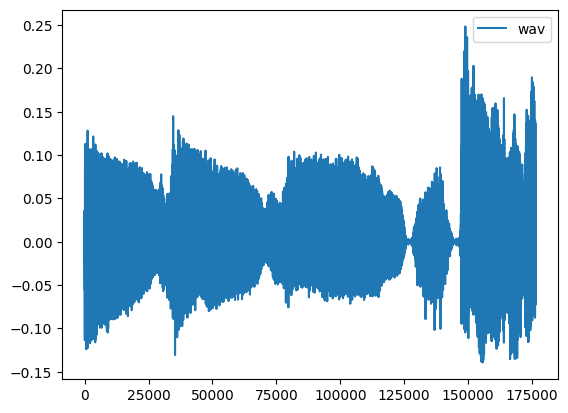

In [2]:
AUDIO_PATH = '/home/yytung/projects/MixingSecrets/dataset/Plums/raw_tracks/06_LeadVox.wav'
wav, sr = sf.read(AUDIO_PATH)
wav = wav[sr*15:sr*19]
ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Basic Delay

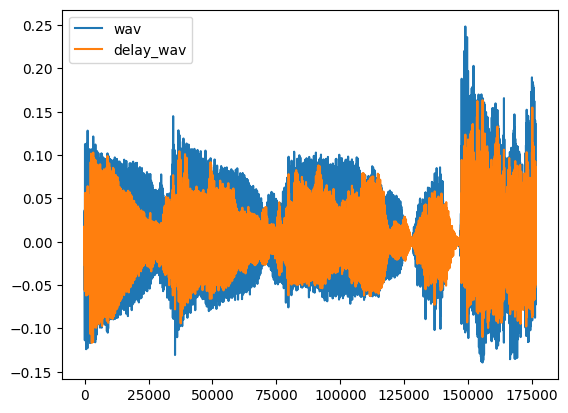

In [3]:
from diffFx_pytorch.processors.delay import BasicDelay      
DELAY_DSP_PARAMS = {
    'delay_ms': 50.0,
    'mix': 0.5
}

Processor = BasicDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy(),      label='delay_wav')
plt.legend()

## Feedback Delay

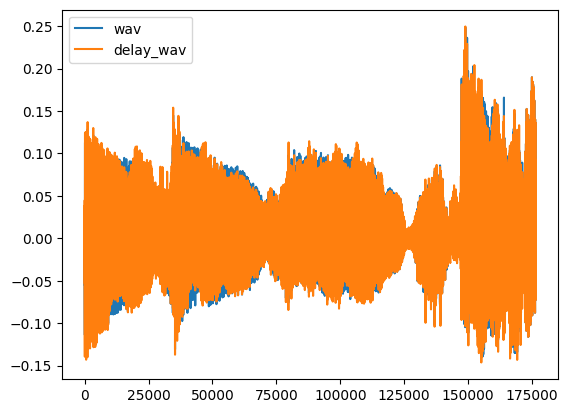

In [4]:
from diffFx_pytorch.processors.delay import BasicFeedbackDelay      
DELAY_DSP_PARAMS = {
    'delay_ms': 100.0,
    'mix': 0.5,
    'fb_gain': 0.1,
    'ff_gain': 0.5
}

Processor = BasicFeedbackDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy(),      label='delay_wav')
plt.legend()

## Slapback Delay

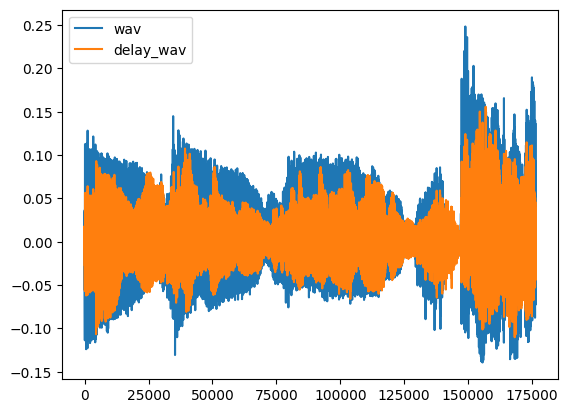

In [5]:
from diffFx_pytorch.processors.delay import SlapbackDelay      
DELAY_DSP_PARAMS = {
    'delay_ms': 100.0,
    'mix': 0.5,
}

Processor = SlapbackDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy(),      label='delay_wav')
plt.legend()

## Multi-taps Delay

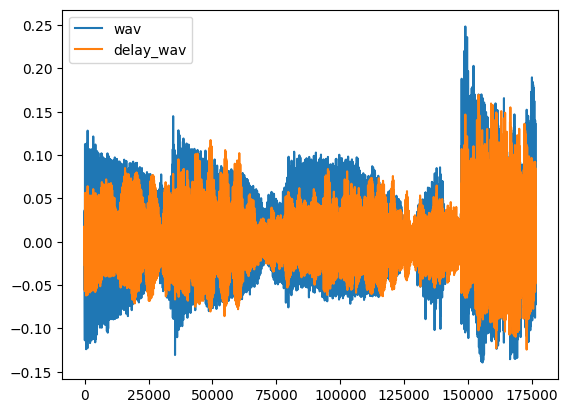

In [6]:
from diffFx_pytorch.processors.delay import MultiTapsDelay      
DELAY_DSP_PARAMS = {
    '0_tap_delays_ms': 125.0,  # Eighth note at 120 BPM
    '0_tap_gains': 0.8,
    '1_tap_delays_ms': 250.0,  # Quarter note
    '1_tap_gains': 0.6,
    '2_tap_delays_ms': 375.0,  # Dotted quarter
    '2_tap_gains': 0.4,
    '3_tap_delays_ms': 500.0,  # Half note
    '3_tap_gains': 0.2,
    'mix': 0.5
}

Processor = MultiTapsDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy(),      label='delay_wav')
plt.legend()

## Ping-pong Delay

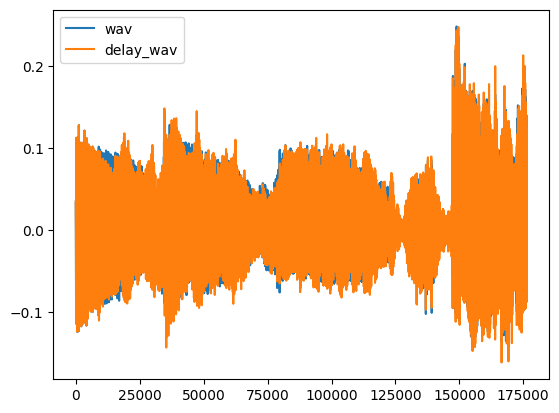

In [8]:
from diffFx_pytorch.processors.delay import PingPongDelay     
DELAY_DSP_PARAMS = {
    'delay_ms': 200.0,
    'feedback_ch1': 0.5,
    'feedback_ch2': 0.7,
    'mix': 0.5
}

Processor = PingPongDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav = torch.cat([test_wav, test_wav], dim=1)
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy()[0, :],      label='delay_wav')
plt.legend()